In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import numpy as np
import datetime
import tensorboard as tb
import seaborn as sns

In [17]:
from matplotlib import patheffects
from sklearn.manifold import TSNE

SNE converts the euclidean distance between points $x_i,x_j ...$ of the dataset into conditional probabilities $p_{j|i}$ for the higher dimensional representation and $q_{j|i}$ for the lower dimensional (2 or 3) visualization. The distributions are defined as:
\begin{align}
p_{j|i} = \frac{exp(\frac{-||x_i-x_j||^2}{x\sigma_i^{2}})}{\Sigma_{k \ne i}exp(\frac{-||x_i-x_j||^2}{x\sigma_i^{2}})}\\
\\
q_{j|i} = \frac{exp(-||y_i-y_j||^2)}{\Sigma_{k \ne i}exp(-||y_i-y_k||^2)}\\
\end{align}

where $p_{j|i}$ is the distribution for the higher dimensional representation, $q_{j|i}$ is the lower dimensional representation and $y_i$ is the instance of data $x_i$ in the lower dimensional space.

$\sigma_i$ for $P_i$ is dictated by the perplexity of the data:
\begin{align}
Perp(P_i) = 2^{H(P_i)}\\
\\
\end{align}
Where perplexity is defined by the exponentiation of the entropy; the higher the entropy, the more random the distribution, the less certain we are about the prediction of the sample. 
One intuition is with dice; you can think of perplexity as the number of sides required of a fair die that when rolled, produces a sequence with the same entropy as your given probability distribution, in that sense it's about the number of clusters that a single sample could exist in.

The goal here is simply to minimize the KL-divergence between $P_i$ and $Q_i$. 
The cost funtion is the sum of KL-divergence for each instance of $P_i, Q_i$ with everyother instance of data $x_j,y_j$:
\begin{align}
\\
C = \Sigma_{i} D_{KL}(P_i||Q_i)\\
\\
\end{align}

In [3]:
(images,labels),(_,_)=tf.keras.datasets.mnist.load_data()

In [4]:
images = images.reshape((60000,28*28))

In [5]:
data = images[:20000]
labels = labels[:20000]

In [22]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def tnse_scatter(data, labels):
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(data[:,0], data[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    plot_labels = []

    for i in range(num_classes):
        x, y = np.median(data[labels == i, :], axis=0)
        txt = ax.text(x, y, str(i), fontsize=18)
        txt.set_path_effects([
            patheffects.Stroke(linewidth=5, foreground="w"),
            patheffects.Normal()])
        plot_labels.append(txt)

    return fig, ax, sc, plot_labels

(<Figure size 576x576 with 1 Axes>,
 [Text(56.984085, 24.7449, '0'),
  Text(-36.946686, 33.630383, '1'),
  Text(3.2672975, 59.32678, '2'),
  Text(18.02988, 18.398129, '3'),
  Text(-24.365717, -50.053474, '4'),
  Text(23.382694, -26.428988, '5'),
  Text(55.583614, -26.527721, '6'),
  Text(-58.551197, -12.150818, '7'),
  Text(-9.010788, 2.5271, '8'),
  Text(-16.686287, -30.086555, '9')])

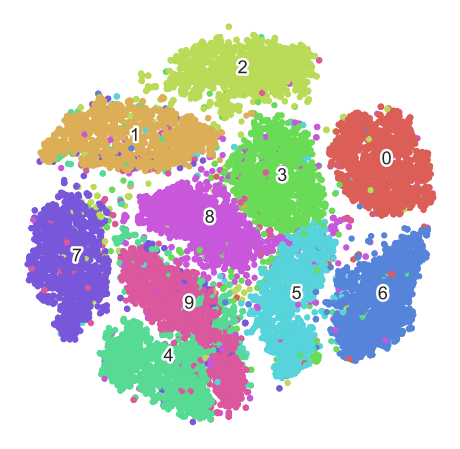

In [23]:
mnist_tsne=TSNE().fit_transform(data)
tnse_scatter(mnist_tsne, labels)